# Dados Duplicados

In [34]:
DATA_DIR = "C:\\Users\\glauc\\OneDrive\\Área de Trabalho\\data_science\\studies\\FormacaoCD\\9.Prática em R\\dados\\Churn.csv"
data = read.csv(DATA_DIR, sep = ";", na.strings = "", stringsAsFactors = T)
summary(data)

       X0               X1         X2              X3            X4       
 Min.   :   1.0   Min.   :376.0   PR:257   F        :  2   Min.   :-20.0  
 1st Qu.: 251.5   1st Qu.:580.0   RP:  1   Fem      :  1   1st Qu.: 32.0  
 Median : 501.0   Median :653.0   RS:478   Feminino :461   Median : 37.0  
 Mean   : 500.9   Mean   :648.6   SC:258   M        :  6   Mean   : 38.9  
 3rd Qu.: 750.5   3rd Qu.:721.0   SP:  4   Masculino:521   3rd Qu.: 44.0  
 Max.   :1000.0   Max.   :850.0   TD:  1   NA's     :  8   Max.   :140.0  
                                                                          
      X4.1              X6                 X7              X8        
 Min.   : 0.000   Min.   :       0   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 2.000   1st Qu.:       0   1st Qu.:1.000   1st Qu.:0.0000  
 Median : 5.000   Median : 8958835   Median :1.000   Median :1.0000  
 Mean   : 5.069   Mean   : 7164928   Mean   :1.527   Mean   :0.7027  
 3rd Qu.: 8.000   3rd Qu.:12586844   3rd Qu.:2.000

In [35]:
colnames(data) = c(
    'id', 'score', 'estado', 'genero', 'idade', 'patrimonio', 'saldo',
    'produtos', 'temcardcredito', 'ativo', 'salario', 'saiu'
)
summary(data)

       id             score       estado         genero        idade      
 Min.   :   1.0   Min.   :376.0   PR:257   F        :  2   Min.   :-20.0  
 1st Qu.: 251.5   1st Qu.:580.0   RP:  1   Fem      :  1   1st Qu.: 32.0  
 Median : 501.0   Median :653.0   RS:478   Feminino :461   Median : 37.0  
 Mean   : 500.9   Mean   :648.6   SC:258   M        :  6   Mean   : 38.9  
 3rd Qu.: 750.5   3rd Qu.:721.0   SP:  4   Masculino:521   3rd Qu.: 44.0  
 Max.   :1000.0   Max.   :850.0   TD:  1   NA's     :  8   Max.   :140.0  
                                                                          
   patrimonio         saldo             produtos     temcardcredito  
 Min.   : 0.000   Min.   :       0   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 2.000   1st Qu.:       0   1st Qu.:1.000   1st Qu.:0.0000  
 Median : 5.000   Median : 8958835   Median :1.000   Median :1.0000  
 Mean   : 5.069   Mean   : 7164928   Mean   :1.527   Mean   :0.7027  
 3rd Qu.: 8.000   3rd Qu.:12586844   3rd Qu.:2.000

In [36]:
x = data[duplicated(data$id),]
x

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
82,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366,0


In [37]:
data = data[!data$id %in% c(x$id),]
data[data$id == x$id, ]
y = data[duplicated(data$id), ]
y

id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>


id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>


In [38]:
unique(data$estado)
summary(data$estado)
data[!data$estado %in% c('RS', 'SC', 'PR'), ]$estado = 'RS'

[1] RS SC PR RP SP TD
Levels: PR RP RS SC SP TD

PR  RP  RS  SC  SP  TD 
257   1 476 258   4   1

In [39]:
summary(data$estado)
data$estado = factor(data$estado)
summary(data$estado)


PR  RP  RS  SC  SP  TD 
257   0 482 258   0   0

PR  RS  SC 
257 482 258

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
9.677e+03 3.011e+06 8.688e+06 3.532e+07 1.404e+07 1.193e+10         7 

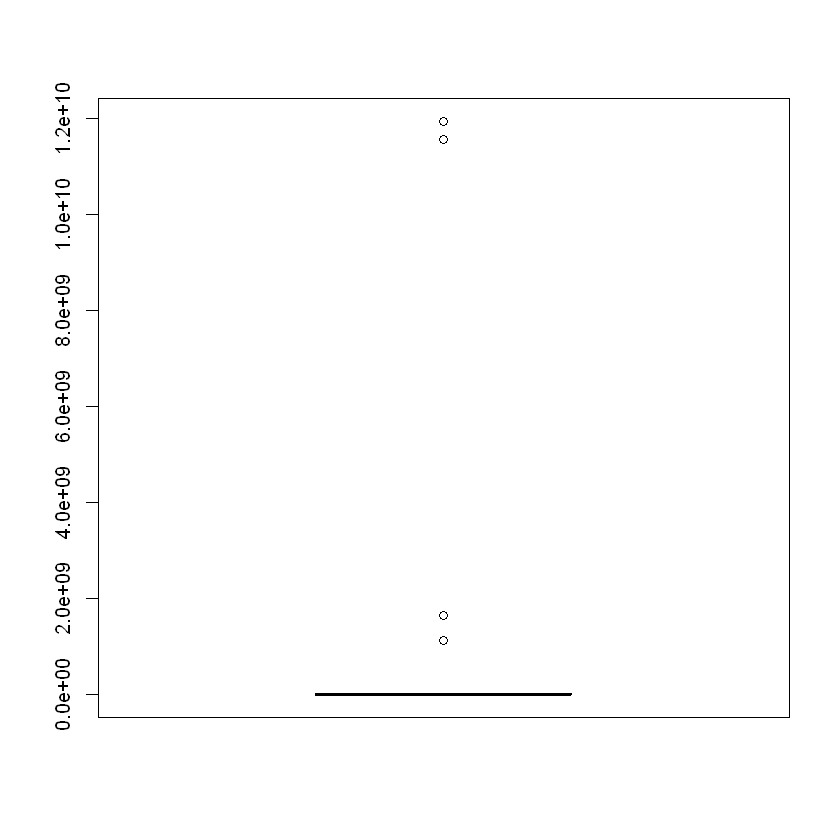

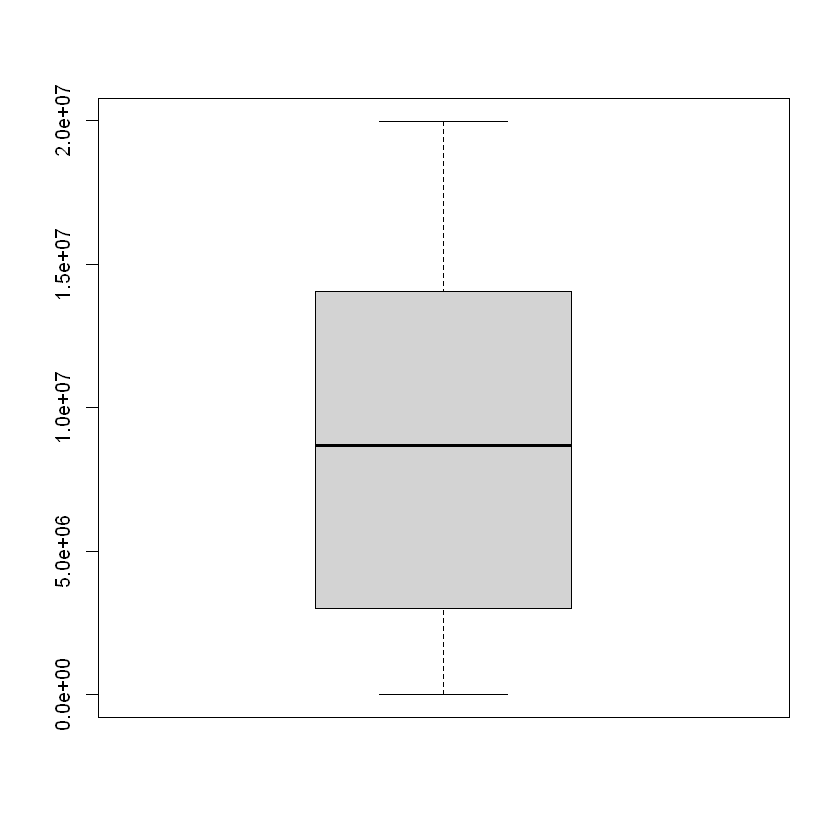

In [40]:
summary(data$salario)
boxplot(data$salario)
boxplot(data$salario, outline = F)

In [41]:
summary(data$salario)
data[data$salario >= 2 * desv,]$salario
median(data$salario, na.rm = T)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
9.677e+03 3.011e+06 8.688e+06 3.532e+07 1.404e+07 1.193e+10         7 

[1] 11934688000          NA          NA 11563829000  1640178900          NA
 [7]  1119811900          NA          NA          NA          NA

[1] 8687742

In [42]:
data[!complete.cases(data$salario),]
data[is.na(data$salario),]$salario = median(data$salario, na.rm = T)

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
18,18,549,SC,Feminino,24,9,0,2,1,1,NA,0
53,53,788,RS,Feminino,33,5,0,2,0,0,NA,0
180,181,754,PR,Feminino,55,3,16160881,1,1,0,NA,1
331,332,656,RS,Masculino,50,7,0,2,0,1,NA,0
427,428,492,PR,Masculino,39,10,12457665,2,1,0,NA,0
551,552,721,PR,Feminino,36,3,6525307,2,1,0,NA,0
984,985,614,PR,Feminino,35,6,12810028,1,0,0,NA,1


In [43]:
data[!complete.cases(data$salario),]

id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>


In [44]:
median(data$salario)
desv = sd(data$salario)
desv

[1] 8687742

[1] 529250588

In [45]:
data[data$salario >= 2 * desv, ]$salario = median(data$salario)

numeric(0)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    9677  3073095  8687742  8834598 13909373 19972539 

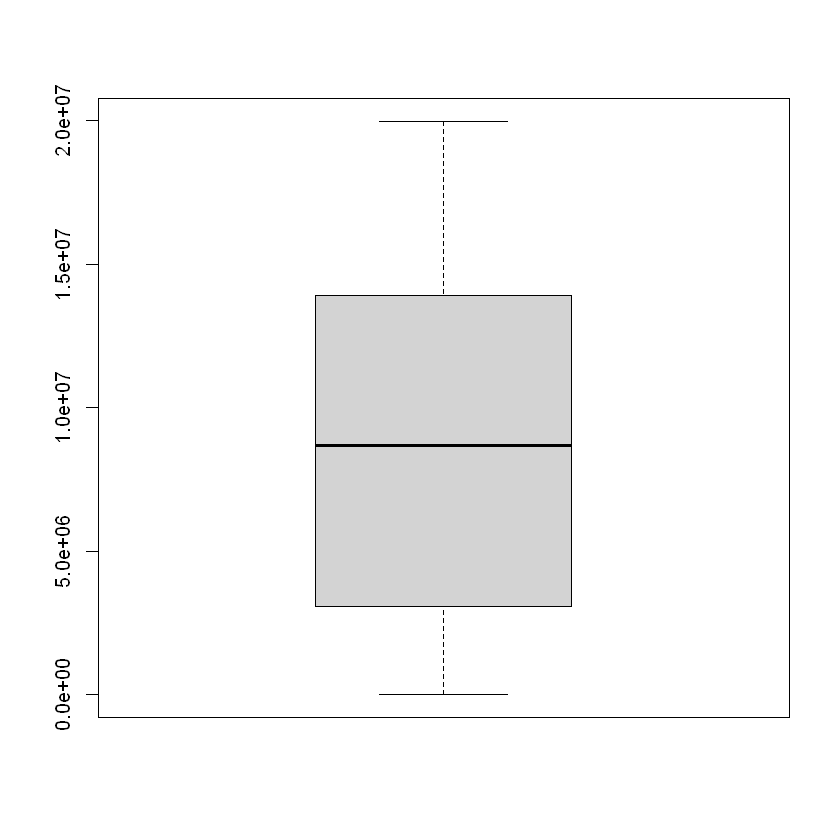

In [47]:
data[data$salario >= 2 * desv, ]$salario
summary(data$salario)
boxplot(data$salario)